In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data_path = "Inter Marks vs GPA.csv"
dataset = pd.read_csv(data_path)
dataset.head()

,Inter,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
dataset.shape

(84, 2)

In [4]:
dataset.columns

Index(['Inter', 'GPA'], dtype='object')

In [7]:
dataset.info

<bound method DataFrame.info of     Inter   GPA
0    1714  2.40
1    1664  2.52
2    1760  2.54
3    1685  2.74
4    1693  2.83
..    ...   ...
79   1936  3.71
80   1810  3.71
81   1987  3.73
82   1962  3.76
83   2050  3.81

[84 rows x 2 columns]>

In [8]:
dataset.describe

<bound method NDFrame.describe of     Inter   GPA
0    1714  2.40
1    1664  2.52
2    1760  2.54
3    1685  2.74
4    1693  2.83
..    ...   ...
79   1936  3.71
80   1810  3.71
81   1987  3.73
82   1962  3.76
83   2050  3.81

[84 rows x 2 columns]>

In [9]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58, 1)
(26, 1)
(58,)
(26,)


In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [0.00170771]
a = 0.16251091768368786


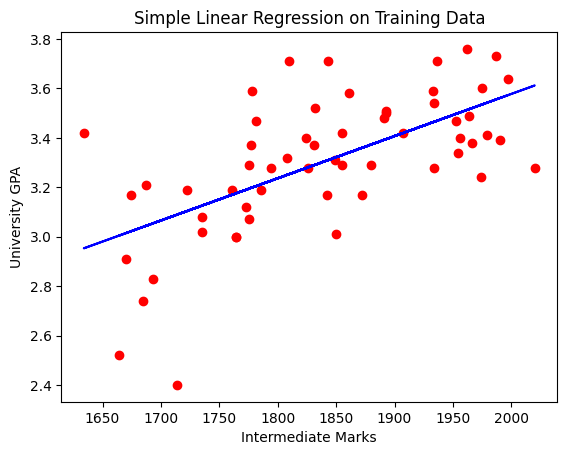

In [17]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
# regressor.predict(x_train)  because it is predicted salaries for x_train
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Intermediate Marks")
plt.ylabel("University GPA")
plt.show()

In [22]:
import pickle

model_filename = "linear_regressor_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(regressor, file)
print(f"Model saved to {model_filename}.")

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded from file.")

Model saved to linear_regressor_model.pkl.
Model loaded from file.


In [23]:
y_pred = loaded_model.predict(X_test)

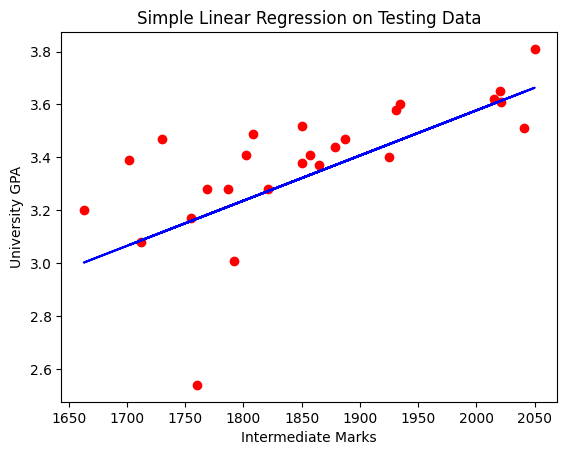

In [24]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
# y_pred  because it is predicted salaries for x_test
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Intermediate Marks")
plt.ylabel("University GPA")
plt.show()

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:



Mean Squared Error (MSE) is the mean of the squared errors:



Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:



Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because you want to minimize them.

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.13329473269292533
MSE: 0.03635217622290396
RMSE: 0.1906624667387474
